# 머신 러닝 모델

In [1]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from matplotlib import pyplot
from sklearn.metrics import classification_report

In [2]:
PATH = "C:/Users/ANDlab3/OneDrive - 연세대학교 (Yonsei University)/2021-2학기/2.텍스트마이닝/텀프로젝트/DataSet.xlsx"

In [3]:
data = pd.read_excel(PATH)

- label = 1 전일 대비 상승

- label = -1 전일 대비 하강

In [4]:
data

,Date,Scaled CP Score,Scaled volume Score,Scaled Senti Kospi Score,Scaled Senti stock Score,label
0,2020-10-05,0.087519,0.086175,0.448550,0.460961,1
1,2020-10-06,0.095129,0.119490,0.230537,0.320265,1
2,2020-10-07,0.115398,0.077477,0.321843,0.379190,1
3,2020-10-08,0.120234,0.153428,0.505174,0.497504,1
4,2020-10-12,0.131572,0.113318,0.474480,0.477695,1
...,...,...,...,...,...,...
260,2021-10-25,0.725767,0.095741,0.350295,0.860651,1
261,2021-10-26,0.753261,0.018600,0.476195,0.495685,1
262,2021-10-27,0.730536,0.033305,0.856211,0.491285,-1
263,2021-10-28,0.715180,0.036490,0.421652,0.555391,-1


In [5]:
x = data[['Scaled CP Score','Scaled volume Score','Scaled Senti Kospi Score','Scaled Senti stock Score']]
y = data['label']

# Train test 데이터셋 분리

- 2020년 10월 ~ 2021년 9월까지 데이터로 학습
- 2020년 11월 데이터로 테스트

In [6]:
train = data['Date'] <= '2021-09-30'
test = data['Date'] > '2021-09-30'

In [7]:
train_data = data[train]
train_data

,Date,Scaled CP Score,Scaled volume Score,Scaled Senti Kospi Score,Scaled Senti stock Score,label
0,2020-10-05,0.087519,0.086175,0.448550,0.460961,1
1,2020-10-06,0.095129,0.119490,0.230537,0.320265,1
2,2020-10-07,0.115398,0.077477,0.321843,0.379190,1
3,2020-10-08,0.120234,0.153428,0.505174,0.497504,1
4,2020-10-12,0.131572,0.113318,0.474480,0.477695,1
...,...,...,...,...,...,...
241,2021-09-24,0.826629,0.082646,0.211034,0.477314,-1
242,2021-09-27,0.834721,0.126780,0.572079,0.493825,1
243,2021-09-28,0.800310,0.130747,0.876160,0.646524,-1
244,2021-09-29,0.764041,0.105844,0.823138,0.480773,-1


In [8]:
test_data = data[test]
test_data

,Date,Scaled CP Score,Scaled volume Score,Scaled Senti Kospi Score,Scaled Senti stock Score,label
246,2021-10-01,0.724457,0.117361,0.971218,0.516042,-1
247,2021-10-05,0.669537,0.112294,0.737808,0.483591,-1
248,2021-10-06,0.617652,0.133058,0.585061,0.455209,-1
249,2021-10-07,0.666927,0.029064,0.561415,0.743237,1
250,2021-10-08,0.663883,0.054037,0.465127,0.857588,-1
251,2021-10-12,0.625426,0.051061,0.590849,0.590160,-1
252,2021-10-13,0.652429,0.082276,0.699428,0.513994,1
253,2021-10-14,0.695037,0.036460,0.167336,0.394678,1
254,2021-10-15,0.720488,0.118147,0.293502,0.507868,1
255,2021-10-18,0.712415,0.141425,0.749225,0.624210,-1


In [9]:
print(len(train_data))
print(len(test_data))

246
19


In [10]:
x_train = train_data[['Scaled CP Score','Scaled volume Score','Scaled Senti Kospi Score','Scaled Senti stock Score']]
y_train = train_data['label']

In [11]:
x_test = test_data[['Scaled CP Score','Scaled volume Score','Scaled Senti Kospi Score','Scaled Senti stock Score']]
y_test = test_data['label']

In [12]:
x_train

,Scaled CP Score,Scaled volume Score,Scaled Senti Kospi Score,Scaled Senti stock Score
0,0.087519,0.086175,0.448550,0.460961
1,0.095129,0.119490,0.230537,0.320265
2,0.115398,0.077477,0.321843,0.379190
3,0.120234,0.153428,0.505174,0.497504
4,0.131572,0.113318,0.474480,0.477695
...,...,...,...,...
241,0.826629,0.082646,0.211034,0.477314
242,0.834721,0.126780,0.572079,0.493825
243,0.800310,0.130747,0.876160,0.646524
244,0.764041,0.105844,0.823138,0.480773


In [13]:
x_test

,Scaled CP Score,Scaled volume Score,Scaled Senti Kospi Score,Scaled Senti stock Score
246,0.724457,0.117361,0.971218,0.516042
247,0.669537,0.112294,0.737808,0.483591
248,0.617652,0.133058,0.585061,0.455209
249,0.666927,0.029064,0.561415,0.743237
250,0.663883,0.054037,0.465127,0.857588
251,0.625426,0.051061,0.590849,0.590160
252,0.652429,0.082276,0.699428,0.513994
253,0.695037,0.036460,0.167336,0.394678
254,0.720488,0.118147,0.293502,0.507868
255,0.712415,0.141425,0.749225,0.624210


In [14]:
y_train

0      1
1      1
2      1
3      1
4      1
      ..
241   -1
242    1
243   -1
244   -1
245    1
Name: label, Length: 246, dtype: int64

In [15]:
y_test

246   -1
247   -1
248   -1
249    1
250   -1
251   -1
252    1
253    1
254    1
255   -1
256    1
257   -1
258   -1
259   -1
260    1
261    1
262   -1
263   -1
264   -1
Name: label, dtype: int64

In [16]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [17]:
y_train = np.array(y_train)
y_test = np.array(y_test)

# 머신 러닝 모델 탐색

In [18]:
def get_models():
    models = dict()
    models['LR'] = LogisticRegression()
    models['RF'] = RandomForestClassifier()
    models['CART'] = DecisionTreeClassifier()
    models['SVM'] = SVC()
    return models

In [19]:
models = get_models()

In [20]:
results, names = [],[]
for name, model in models.items():
    fit_model = model.fit(x_train, y_train)
    scores = fit_model.score(x_test, y_test)
    print(name,':', scores)
#     scores = model.score(x_test, y_test)
#     results.append(scores)
#     name.append(name)
#     print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

LR : 0.6842105263157895
RF : 0.6842105263157895
CART : 0.5789473684210527
SVM : 0.6842105263157895


In [21]:
for name, model in models.items():
    predicted_model = model.predict(x_test)
    confusion = classification_report(y_test, predicted_model)
    
    print("\n")
    print("모델이름 :"+ name)
    print(confusion)
    print("\n")



모델이름 :LR
              precision    recall  f1-score   support

          -1       0.88      0.58      0.70        12
           1       0.55      0.86      0.67         7

    accuracy                           0.68        19
   macro avg       0.71      0.72      0.68        19
weighted avg       0.75      0.68      0.69        19





모델이름 :RF
              precision    recall  f1-score   support

          -1       0.80      0.67      0.73        12
           1       0.56      0.71      0.63         7

    accuracy                           0.68        19
   macro avg       0.68      0.69      0.68        19
weighted avg       0.71      0.68      0.69        19





모델이름 :CART
              precision    recall  f1-score   support

          -1       0.75      0.50      0.60        12
           1       0.45      0.71      0.56         7

    accuracy                           0.58        19
   macro avg       0.60      0.61      0.58        19
weighted avg       0.64      0.58  

# LR 모델 훈련

In [22]:
model = LogisticRegression()
model = model.fit(x_train, y_train)

In [23]:
probability = model.predict_proba(x_test)
print( probability )

[[0.76364696 0.23635304]
 [0.5965717  0.4034283 ]
 [0.46513952 0.53486048]
 [0.4872462  0.5127538 ]
 [0.42049751 0.57950249]
 [0.48815657 0.51184343]
 [0.56886568 0.43113432]
 [0.1981668  0.8018332 ]
 [0.27623339 0.72376661]
 [0.62241706 0.37758294]
 [0.37917821 0.62082179]
 [0.59861129 0.40138871]
 [0.2862383  0.7137617 ]
 [0.61812323 0.38187677]
 [0.34331078 0.65668922]
 [0.41423653 0.58576347]
 [0.69577057 0.30422943]
 [0.3712566  0.6287434 ]
 [0.61783552 0.38216448]]


In [24]:
predicted = model.predict(x_test)
print(predicted)

[-1 -1  1  1  1  1 -1  1  1 -1  1 -1  1 -1  1  1 -1  1 -1]


In [25]:
print(metrics.confusion_matrix( y_test, predicted ))

[[7 5]
 [1 6]]


In [26]:
print(metrics.classification_report( y_test, predicted ))

              precision    recall  f1-score   support

          -1       0.88      0.58      0.70        12
           1       0.55      0.86      0.67         7

    accuracy                           0.68        19
   macro avg       0.71      0.72      0.68        19
weighted avg       0.75      0.68      0.69        19



In [27]:
print(model.score(x_test,y_test))

0.6842105263157895


In [28]:
data['Signal'] = model.predict(x)

In [29]:
#Kospi 지수의 일간수익률을 계산해 저장
data['Kospi_returns'] = np.log(data['Scaled CP Score']/data['Scaled CP Score'].shift(1))

C:\Users\ANDlab3\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [30]:
split = 246

In [31]:
#Kospi 지수의 누적 일간수익률을 구한다.
Cumulative_Kospi_returns = np.cumsum(data[split:]['Kospi_returns'])

In [32]:
data['STR_returns'] = data['Kospi_returns'] * data['Signal'].shift(1)

In [33]:
#전략의 누적 일간수익률을 구한다.
Cumulative_STR_returns = np.cumsum(data[split:]['STR_returns'])

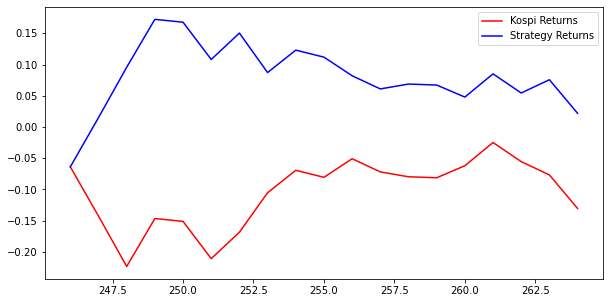

In [34]:
pyplot.figure( figsize =(10, 5 ))

# Kospi지수의 일간 수익률
pyplot.plot( Cumulative_Kospi_returns, color='r', label = 'Kospi Returns' )

# 전략의 누적 일간수익률
pyplot.plot( Cumulative_STR_returns, color='b', label = 'Strategy Returns' )

pyplot.legend( )
pyplot.show( )

In [35]:
#Kospi 지수의 누적 일간수익률을 구한다.
Cumulative_Kospi_returns1 = np.cumsum(data['Kospi_returns'])
Cumulative_STR_returns1 = np.cumsum(data['STR_returns'])

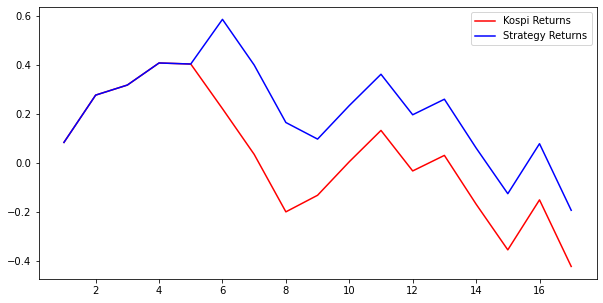

In [36]:
pyplot.figure( figsize =(10, 5 ))

# Kospi지수의 일간 수익률
pyplot.plot( Cumulative_Kospi_returns1, color='r', label = 'Kospi Returns' )

# 전략의 누적 일간수익률
pyplot.plot( Cumulative_STR_returns1, color='b', label = 'Strategy Returns' )

pyplot.legend( )
pyplot.show( )

## 랜덤 포레스트 모델로 예측

In [37]:
RF_model = RandomForestClassifier()
RF_model = RF_model.fit(x_train, y_train)

In [38]:
df = data.copy()

In [39]:
df['Signal'] = RF_model.predict(x)

In [40]:
df['Kospi_returns'] = np.log(df['Scaled CP Score']/df['Scaled CP Score'].shift(1))

C:\Users\ANDlab3\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [41]:
split = 246

In [42]:
Cumulative_Kospi_returns = np.cumsum(df[split:]['Kospi_returns'])
df['STR_returns'] = df['Kospi_returns'] * df['Signal'].shift(1)
Cumulative_STR_returns = np.cumsum(df[split:]['STR_returns'])

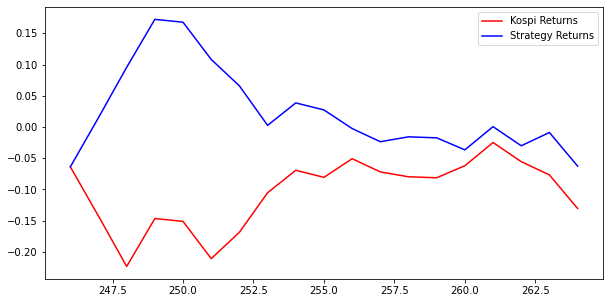

In [43]:
pyplot.figure( figsize =(10, 5 ))

# Kospi지수의 일간 수익률
pyplot.plot( Cumulative_Kospi_returns, color='r', label = 'Kospi Returns' )

# 전략의 누적 일간수익률
pyplot.plot( Cumulative_STR_returns, color='b', label = 'Strategy Returns' )

pyplot.legend( )
pyplot.show( )

In [44]:
#Kospi 지수의 누적 일간수익률을 구한다.
Cumulative_Kospi_returns1 = np.cumsum(df['Kospi_returns'])
Cumulative_STR_returns1 = np.cumsum(df['STR_returns'])

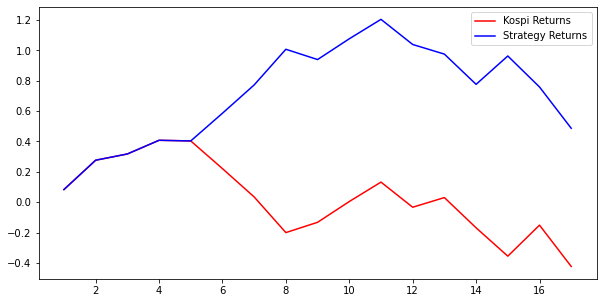

In [45]:
pyplot.figure( figsize =(10, 5 ))

# Kospi지수의 일간 수익률
pyplot.plot( Cumulative_Kospi_returns1, color='r', label = 'Kospi Returns' )

# 전략의 누적 일간수익률
pyplot.plot( Cumulative_STR_returns1, color='b', label = 'Strategy Returns' )

pyplot.legend( )
pyplot.show( )

## 추가 실험

In [46]:
df = pd.read_excel(PATH)

In [47]:
df.head()

,Date,Scaled CP Score,Scaled volume Score,Scaled Senti Kospi Score,Scaled Senti stock Score,label
0,2020-10-05,0.087519,0.086175,0.448550,0.460961,1
1,2020-10-06,0.095129,0.119490,0.230537,0.320265,1
2,2020-10-07,0.115398,0.077477,0.321843,0.379190,1
3,2020-10-08,0.120234,0.153428,0.505174,0.497504,1
4,2020-10-12,0.131572,0.113318,0.474480,0.477695,1


In [48]:
x = df[['Scaled CP Score','Scaled volume Score']]
y = df['label']

In [49]:
train = df['Date'] <= '2021-09-30'
test = df['Date'] > '2021-09-30'

In [50]:
train_data = df[train]
test_data = df[test]

In [51]:
x_train = train_data[['Scaled CP Score','Scaled volume Score']]
y_train = train_data['label']

In [52]:
x_test = test_data[['Scaled CP Score','Scaled volume Score']]
y_test = test_data['label']

In [53]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [54]:
model = LogisticRegression()
model = model.fit(x_train, y_train)

In [55]:
predicted = model.predict(x_test)

In [56]:
print(metrics.classification_report( y_test, predicted ))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        12
           1       0.37      1.00      0.54         7

    accuracy                           0.37        19
   macro avg       0.18      0.50      0.27        19
weighted avg       0.14      0.37      0.20        19



C:\Users\ANDlab3\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANDlab3\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANDlab3\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
df['Signal'] = model.predict(x)

In [58]:
df['Kospi_returns'] = np.log(df['Scaled CP Score']/df['Scaled CP Score'].shift(1))

C:\Users\ANDlab3\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [59]:
split = 246
Cumulative_Kospi_returns = np.cumsum(df[split:]['Kospi_returns'])
df['STR_returns'] = df['Kospi_returns'] * df['Signal'].shift(1)
Cumulative_STR_returns = np.cumsum(df[split:]['STR_returns'])

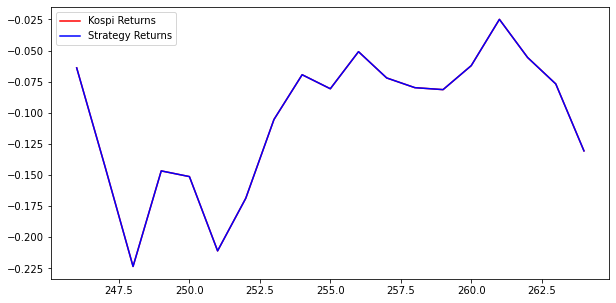

In [60]:
pyplot.figure( figsize =(10, 5 ))

# Kospi지수의 일간 수익률
pyplot.plot( Cumulative_Kospi_returns, color='r', label = 'Kospi Returns' )

# 전략의 누적 일간수익률
pyplot.plot( Cumulative_STR_returns, color='b', label = 'Strategy Returns' )

pyplot.legend( )
pyplot.show( )

In [61]:
RF_model = RandomForestClassifier()
RF_model = RF_model.fit(x_train, y_train)

In [62]:
df1 = df.copy()

In [63]:
df1['Signal'] = RF_model.predict(x)

In [64]:
df1['Kospi_returns'] = np.log(df1['Scaled CP Score']/df1['Scaled CP Score'].shift(1))

C:\Users\ANDlab3\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [65]:
Cumulative_Kospi_returns = np.cumsum(df1[split:]['Kospi_returns'])
df1['STR_returns'] = df1['Kospi_returns'] * df1['Signal'].shift(1)
Cumulative_STR_returns = np.cumsum(df1[split:]['STR_returns'])

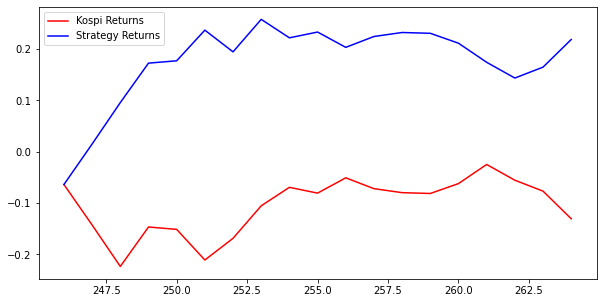

In [66]:
pyplot.figure( figsize =(10, 5 ))

# Kospi지수의 일간 수익률
pyplot.plot( Cumulative_Kospi_returns, color='r', label = 'Kospi Returns' )

# 전략의 누적 일간수익률
pyplot.plot( Cumulative_STR_returns, color='b', label = 'Strategy Returns' )

pyplot.legend( )
pyplot.show( )

In [67]:
predicted = model.predict(x_test)
print(metrics.classification_report( y_test, predicted ))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        12
           1       0.37      1.00      0.54         7

    accuracy                           0.37        19
   macro avg       0.18      0.50      0.27        19
weighted avg       0.14      0.37      0.20        19



C:\Users\ANDlab3\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANDlab3\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANDlab3\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)